In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import bnlearn as bn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from pgmpy.models import BayesianNetwork

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('kbs.csv')

train['Passenger ID'] = train.index

# Atau, tambahkan kolom "Passenger ID" dengan nilai unik (misalnya, nomor urut)
train['Passenger ID'] = range(1, len(train) + 1)

cols = list(train.columns)
cols = ['Passenger ID'] + [col for col in cols if col != 'Passenger ID']
train = train[cols]

train.set_index('Passenger ID', inplace=True)

# Tampilkan trainFrame
train

,Nama Wisata,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,...,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja,Kebun Binatang Surabaya
Passenger ID,,,,,,,,,,,,,,,,,,,,,
1,Tunjungan Plaza,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,0,0,1,0
2,Tunjungan Plaza,1,1,1,1,1,1,1,0,0,...,1,0,0,0,1,1,0,0,1,0
3,Tunjungan Plaza,1,0,1,1,1,1,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,Tunjungan Plaza,1,1,1,1,0,0,1,1,1,...,1,0,0,0,1,0,0,0,1,0
5,Tunjungan Plaza,1,1,1,1,0,1,1,0,0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,Balai Pemuda Alun - Alun Surabaya,1,0,1,1,0,1,1,1,0,...,0,1,1,0,1,0,0,0,0,0
1347,Balai Pemuda Alun - Alun Surabaya,1,1,1,1,0,1,1,1,1,...,0,1,1,0,1,0,0,0,0,0
1348,Balai Pemuda Alun - Alun Surabaya,1,1,1,0,1,1,1,1,1,...,1,1,1,0,1,0,0,1,1,0


In [3]:
drop_list = ['Aktivitas Wisata', 'Nama Wisata']

train_wisata = train.drop(columns=drop_list)
train_wisata

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja,Kebun Binatang Surabaya
Passenger ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,0,...,1,1,0,0,1,1,0,0,1,0
2,1,1,1,1,1,1,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
3,1,0,1,1,1,1,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,1,1,1,1,0,0,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0
5,1,1,1,1,0,1,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,1,0,1,1,0,1,1,1,0,0,...,0,1,1,0,1,0,0,0,0,0
1347,1,1,1,1,0,1,1,1,1,0,...,0,1,1,0,1,0,0,0,0,0
1348,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,0,0,1,1,0


In [4]:
dfhot_train, dfnum_train = bn.df2onehot(train_wisata)



[df2onehot] >Auto detecting dtypes.


  0%|          | 0/24 [00:00<?, ?it/s]

100%|██████████| 24/24 [00:00<00:00, 166.34it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 24/24 [00:00<00:00, 429.98it/s]

[df2onehot] >Total onehot features: 48


In [5]:
dfnum_target = dfnum_train.pop('Kebun Binatang Surabaya')
dfnum_target

0       0
1       0
2       0
3       0
4       0
       ..
1345    0
1346    0
1347    0
1348    0
1349    0
Name: Kebun Binatang Surabaya, Length: 1350, dtype: int64

In [6]:
Xtrain, Xval, Ztrain, Zval = train_test_split(dfnum_train, dfnum_target, test_size=0.2, random_state=0)
valid = pd.concat([Xval, Zval], axis='columns')
dfnum = pd.concat([Xtrain, Ztrain], axis='columns')
dfnum

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja,Kebun Binatang Surabaya
1118,1,1,0,1,0,1,0,1,1,1,...,0,0,1,0,1,0,0,0,1,0
642,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,0,0,0
687,1,1,0,1,0,1,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
322,1,0,1,1,1,0,1,0,1,1,...,1,0,0,0,1,0,0,1,1,0
326,0,0,1,1,1,1,0,0,0,1,...,1,0,0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,1,0,1,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
835,1,1,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1216,1,1,0,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
559,1,1,1,1,1,1,0,1,1,1,...,1,1,1,0,1,1,0,1,1,0


In [7]:
edges = [
    ('Escape', 'Kebun Binatang Surabaya'),
    ('Relaxation', 'Kebun Binatang Surabaya'),
    ('Play', 'Kebun Binatang Surabaya'),
    ('Strenghthening family bonds', 'Kebun Binatang Surabaya'),
    ('Prestige', 'Kebun Binatang Surabaya'),
    ('Social Interaction', 'Kebun Binatang Surabaya'),
    ('Romance', 'Kebun Binatang Surabaya'),
    ('Educational Opportunity', 'Kebun Binatang Surabaya'),
    ('Self-fulfilment', 'Kebun Binatang Surabaya'),
    ('Wish-fulfiment', 'Kebun Binatang Surabaya'),
    ('Lingkungan', 'Kebun Binatang Surabaya'),
    ('Infrastruktur', 'Kebun Binatang Surabaya'),
    ('Fasilitas', 'Kebun Binatang Surabaya'),
    ('Akomodasi', 'Kebun Binatang Surabaya'),
    ('Kebun Binatang Surabaya', 'Makan Bersama'),
    ('Kebun Binatang Surabaya', 'Berolahraga'),
    ('Kebun Binatang Surabaya', 'Belajar'),
    ('Kebun Binatang Surabaya', 'Berinteraksi dengan satwa'),
    ('Kebun Binatang Surabaya', 'Mengambil Foto'),
    ('Kebun Binatang Surabaya', 'Beribadah'),
    ('Kebun Binatang Surabaya', 'Berkemah'),
    ('Kebun Binatang Surabaya', 'Melihat Pemandangan'),
    ('Kebun Binatang Surabaya', 'Berbelanja')
]

In [8]:
params_static = {
    'figsize': (15, 10),
    'width': 20,  # Menyesuaikan lebar panah
    'edge_alpha': 0.5,  # Menyesuaikan kejelasan panah
    'arrowstyle': '-|>',  # Gaya panah (ubah sesuai kebutuhan)
    'arrowsize': 20,  # Ukuran panah
    'minscale': 5,
    'maxscale': 15,
    'layout': 'spring_layout',
    'font_size': 14,
    'font_family': 'sans-serif',
    'alpha': 0.8,
    'node_shape': 'o',
    'font_color': '#000000',
    'facecolor': 'white',
    'visible': True
}

[bnlearn] >No CPDs to print. Hint: Add CPDs as following: <bn.make_DAG(DAG, CPD=[cpd_A, cpd_B, etc])> and use bnlearn.plot(DAG) to make a plot.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


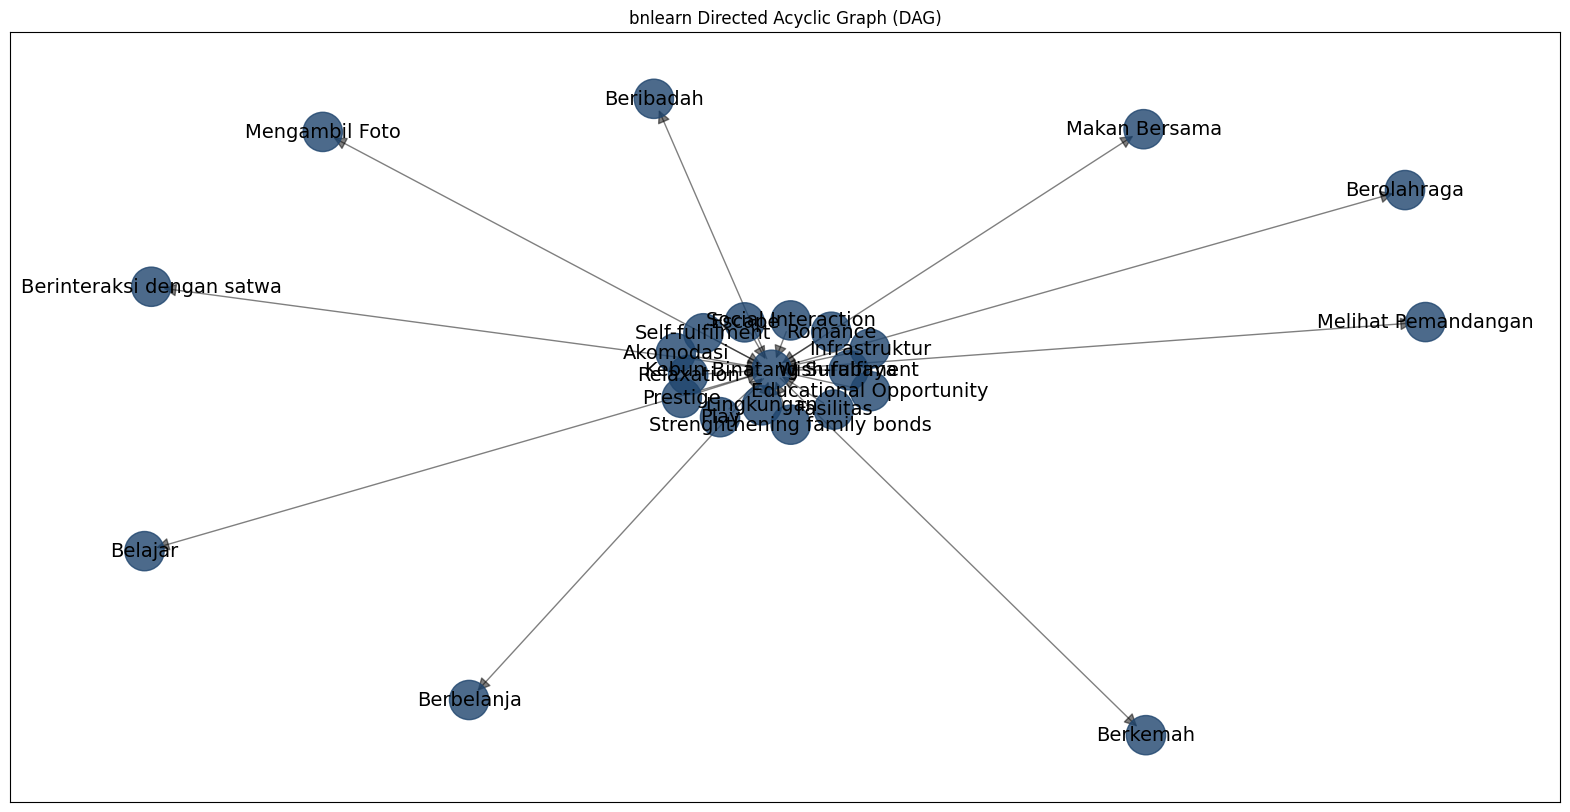

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Escape:
+-----------+----------+
| Escape(0) | 0.299038 |
+-----------+----------+
| Escape(1) | 0.700962 |
+-----------+----------+
[bnlearn] >CPD of Kebun Binatang Surabaya:
+-----------------------------+-----+--------------------------------+
| Akomodasi                   | ... | Akomodasi(1)                   |
+-----------------------------+-----+--------------------------------+
| Educational Opportunity     | ... | Educational Opportunity(1)     |
+-----------------------------+-----+--------------------------------+
| Escape                      | ... | Escape(1)                      |
+-----------------------------+-----+--------------------------------+
| Fasilitas                   | ... | Fasilitas(1)                   |
+-----------------------------+-----+--------------------------------+
| Infrastruktur               | ... | Infrastruktur(1)               |
+-----------------------------

In [9]:
DAG = bn.make_DAG(edges, verbose=0)


bn.print_CPD(DAG)


# Plot
G = bn.plot(DAG, interactive=False, params_static=params_static)


# Parameter learning
model = bn.parameter_learning.fit(DAG, dfnum, verbose=3);



In [10]:
def get_acc(model, df, col):
    # Get accuracy score by the model for the validation dataset df with target col
    pred = bn.predict(model, df, variables=[col])
    acc = accuracy_score(df[col], pred[col])
    print('Accuracy -', acc)
    return acc

In [11]:
get_acc(model, valid, 'Kebun Binatang Surabaya')

[bnlearn]> Remaining columns for inference: 23


  0%|          | 0/254 [00:00<?, ?it/s]

100%|██████████| 254/254 [00:00<00:00, 342.50it/s]

Accuracy - 0.9333333333333333


0.9333333333333333

In [12]:
pred = bn.predict(model, valid, variables=['Kebun Binatang Surabaya'])

[bnlearn]> Remaining columns for inference: 23


100%|██████████| 254/254 [00:00<00:00, 401.43it/s]


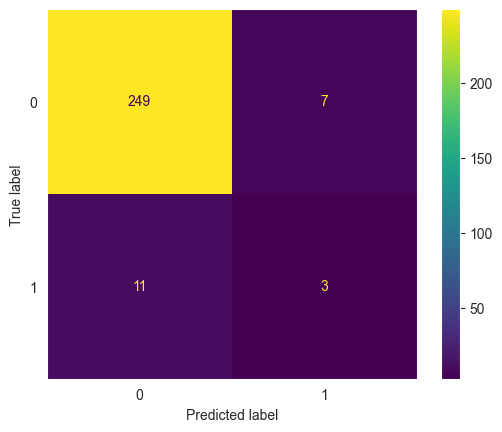

In [13]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ""})
ConfusionMatrixDisplay(confusion_matrix(valid['Kebun Binatang Surabaya'], pred['Kebun Binatang Surabaya'])).plot()